<a href="https://colab.research.google.com/github/Sanket4695/End-to-End-ML-Project/blob/main/PIZZA_STEAK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile,os

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-03-22 17:07:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.5MB/s    in 6.2s    

2024-03-22 17:07:41 (16.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
## lets unzip the dataset

zip_ref = zipfile.ZipFile("/content/pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
## lets view the images randomly

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):

  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image_shape : :",img.shape)

  return img

image_shape : : (512, 512, 3)
image_shape : : (384, 512, 3)


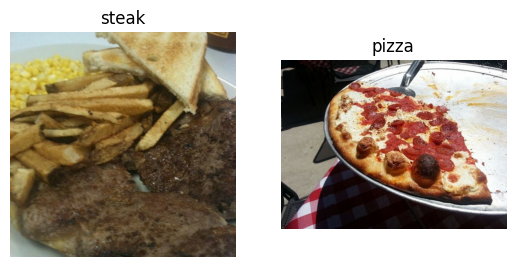

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("/content/pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("/content/pizza_steak/train/","pizza")

image_shape : : (512, 384, 3)
image_shape : : (512, 384, 3)


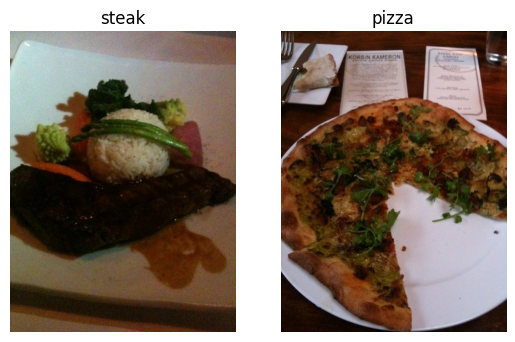

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("/content/pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("/content/pizza_steak/train/","pizza")

In [ ]:
train_dir = "/content/pizza_steak/train/"
test_dir = "/content/pizza_steak/test/"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(
                                train_dir,
                                batch_size = 32,
                                target_size = (224,224),
                                class_mode = "binary"
)

test_data = test_datagen.flow_from_directory(
                                test_dir,
                                batch_size = 32,
                                target_size = (224,224),
                                class_mode = "binary"
)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels = train_data.next()

In [ ]:
len(images),len(labels)

(32, 32)

In [ ]:
labels

array([0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.],
      dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([

          Conv2D(filters = 11, kernel_size = 3, strides = 1, padding = "valid", activation = "relu",input_shape = (224,224,3)),

          Conv2D(filters = 11, kernel_size = 3, strides = 1, padding = "valid", activation = "relu"),

          Conv2D(filters = 11, kernel_size = 3, strides = 1, padding = "valid", activation = "relu"),

          Flatten(),

          Dense(1,activation = "sigmoid")

])


model_4.compile(

                loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"]
)

history_4 = model_4.fit(
    train_data ,
    epochs = 20,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)

)

Epoch 1/20
47/47 [==============================] - 17s 161ms/step - loss: 1.2329 - accuracy: 0.6673 - val_loss: 0.3987 - val_accuracy: 0.8340
Epoch 2/20
47/47 [==============================] - 6s 135ms/step - loss: 0.4227 - accuracy: 0.8160 - val_loss: 0.3778 - val_accuracy: 0.8320
Epoch 3/20
47/47 [==============================] - 6s 134ms/step - loss: 0.3052 - accuracy: 0.8840 - val_loss: 0.3566 - val_accuracy: 0.8500
Epoch 4/20
47/47 [==============================] - 6s 122ms/step - loss: 0.1816 - accuracy: 0.9360 - val_loss: 0.4180 - val_accuracy: 0.8000
Epoch 5/20
47/47 [==============================] - 6s 132ms/step - loss: 0.0841 - accuracy: 0.9780 - val_loss: 0.4367 - val_accuracy: 0.8360
Epoch 6/20
47/47 [==============================] - 6s 125ms/step - loss: 0.0407 - accuracy: 0.9927 - val_loss: 0.5868 - val_accuracy: 0.8200
Epoch 7/20
47/47 [==============================] - 6s 130ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.5952 - val_accuracy: 0.8120
Epoch

In [ ]:
len(train_data),len(test_data)

(47, 16)

<Axes: >

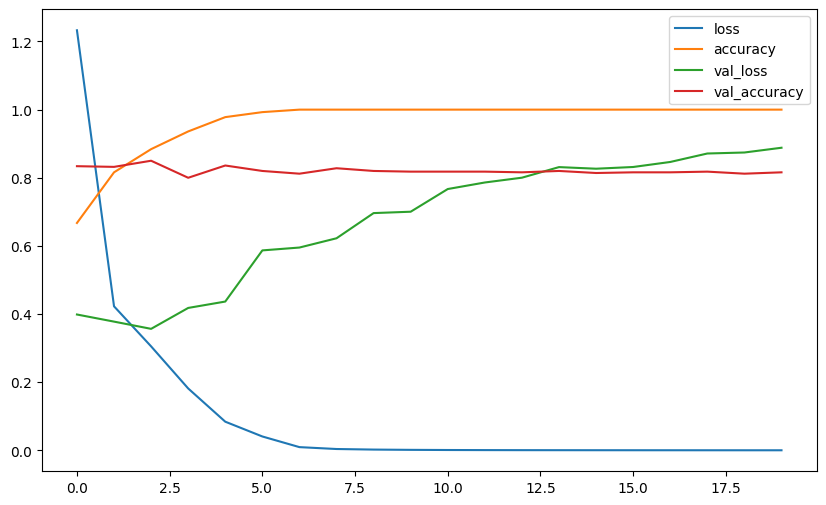

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,6))

In [ ]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history_4.history["loss"]))

  ##plot loss
  plt.plot(epochs,loss,label = "training_loss")
  plt.plot(epochs,val_loss,label = "val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  ##plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label = "training_acc")
  plt.plot(epochs,val_accuracy,label = "val_acc")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();


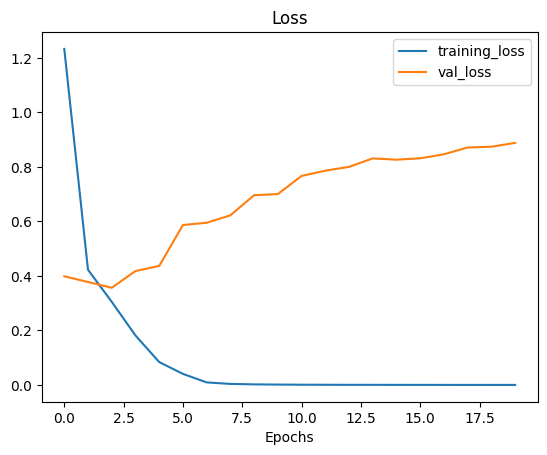

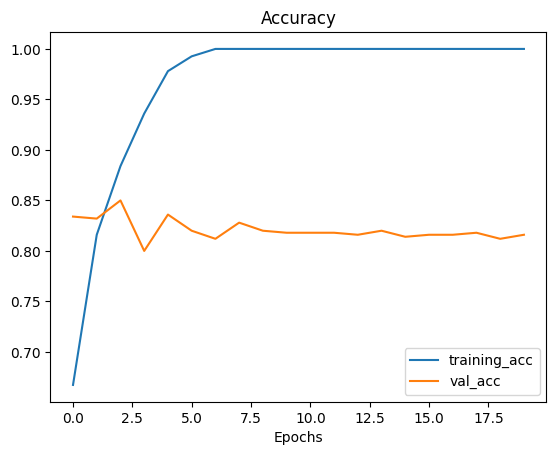

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 11)      308       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 11)      1100      
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 11)      1100      
                                                                 
 flatten (Flatten)           (None, 522764)            0         
                                                                 
 dense (Dense)               (None, 1)                 522765    
                                                                 
Total params: 525273 (2.00 MB)
Trainable params: 525273 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_5 = Sequential([

          Conv2D(filters = 11, kernel_size = 3, strides = 1, padding = "valid", activation = "relu",input_shape = (224,224,3)),
          MaxPooling2D(pool_size = 2),

          Conv2D(filters = 11, kernel_size = 3, strides = 1, padding = "valid", activation = "relu"),
          MaxPooling2D(pool_size = 2),

          Conv2D(filters = 11, kernel_size = 3, strides = 1, padding = "valid", activation = "relu"),
          MaxPooling2D(pool_size = 2),

          Flatten(),

          Dense(1,activation = "sigmoid")

])


model_5.compile(

                loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"]
)

history_5 = model_5.fit(
    train_data ,
    epochs = 20,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)

)

Epoch 1/20
47/47 [==============================] - 9s 130ms/step - loss: 0.5712 - accuracy: 0.7167 - val_loss: 0.4700 - val_accuracy: 0.7860
Epoch 2/20
47/47 [==============================] - 6s 124ms/step - loss: 0.4687 - accuracy: 0.7800 - val_loss: 0.3820 - val_accuracy: 0.8360
Epoch 3/20
47/47 [==============================] - 5s 114ms/step - loss: 0.4236 - accuracy: 0.8180 - val_loss: 0.3663 - val_accuracy: 0.8460
Epoch 4/20
47/47 [==============================] - 5s 114ms/step - loss: 0.4274 - accuracy: 0.8133 - val_loss: 0.3750 - val_accuracy: 0.8380
Epoch 5/20
47/47 [==============================] - 6s 132ms/step - loss: 0.3836 - accuracy: 0.8380 - val_loss: 0.3263 - val_accuracy: 0.8660
Epoch 6/20
47/47 [==============================] - 5s 112ms/step - loss: 0.3442 - accuracy: 0.8567 - val_loss: 0.3237 - val_accuracy: 0.8760
Epoch 7/20
47/47 [==============================] - 7s 140ms/step - loss: 0.3258 - accuracy: 0.8693 - val_loss: 0.3060 - val_accuracy: 0.8780
Epoch 

<Axes: >

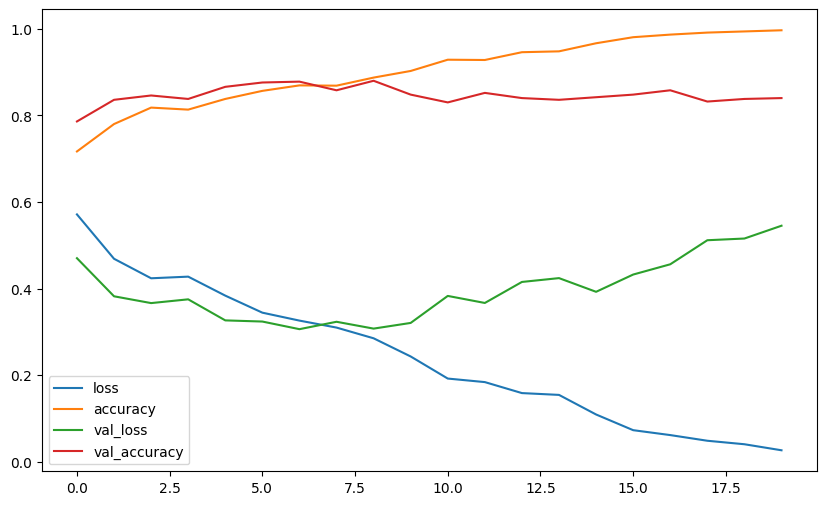

In [ ]:
import pandas as pd
pd.DataFrame(history_5.history).plot(figsize = (10,6))

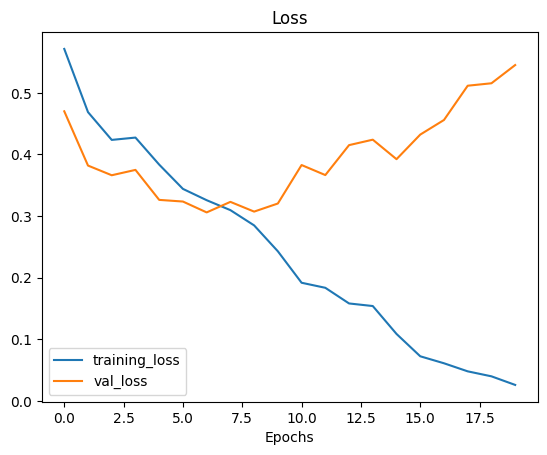

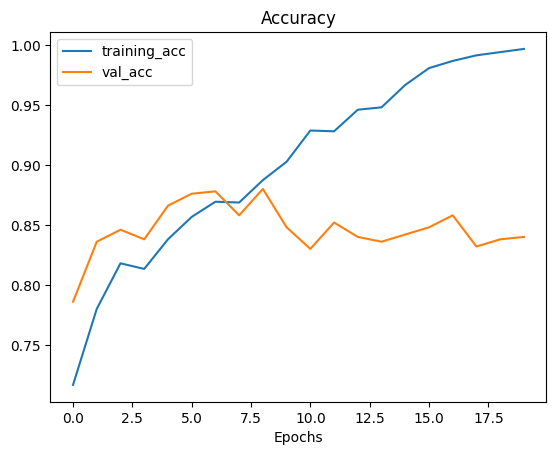

In [ ]:
plot_loss_curves(history_5)

In [ ]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 11)      308       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 11)      0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 11)      1100      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 11)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 11)        1100      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 11)       

In [ ]:
## Create Image Data Generator  training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(
                                        rescale = 1/255.,
                                        rotation_range = 20,
                                        shear_range = 0.2,
                                        zoom_range = 0.2,
                                        width_shift_range = 0.2,
                                        height_shift_range = 0.2,
                                        horizontal_flip = True
)


# creating imagedatagenrator of training instance without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

## creating imagedatagenrator of testing instance without data augmentation
test_datagen = ImageDataGenerator(rescale = 1/255.)




In [ ]:
# lets import the data and augment it

print("Agumented training images : ")
train_data_augmented = train_datagen_augmented.flow_from_directory(
                                                            train_dir,
                                                            target_size = (224,224),
                                                            batch_size = 32,
                                                            class_mode = "binary",
                                                            shuffle=False

)

print("Non-Augmented Images : ")
train_data = train_datagen.flow_from_directory(
                                                train_dir,
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = "binary",
                                                shuffle=False
)

print("Test Images : ")
test_data = test_datagen.flow_from_directory(   test_dir,
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = "binary"
)

Agumented training images : 
Found 1500 images belonging to 2 classes.
Non-Augmented Images : 
Found 1500 images belonging to 2 classes.
Test Images : 
Found 500 images belonging to 2 classes.


In [ ]:
## get the data batch samples

images,labels = train_data.next()
augmented_images,augmented_labels = train_data_augmented.next()

In [ ]:
labels,augmented_labels

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

9
9


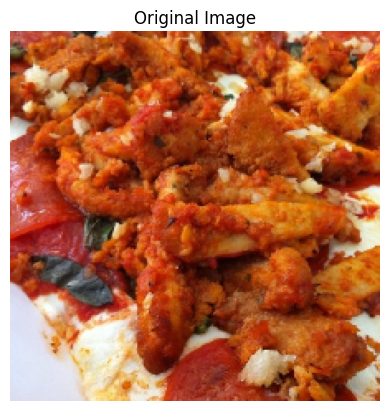

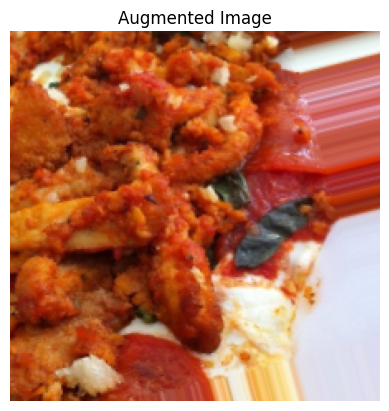

In [ ]:
 ## show the original image and augmented image

random_number = random.randint(0,31)
print(random_number)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
print(random_number)
plt.title(f"Augmented Image")
plt.axis(False);

In [ ]:
model_6 = Sequential([

          Conv2D(filters = 11, kernel_size = 3, strides = 1, padding = "valid", activation = "relu",input_shape = (224,224,3)),
          MaxPooling2D(pool_size = 2),

          Conv2D(filters = 11, kernel_size = 3, strides = 1, padding = "valid", activation = "relu"),
          MaxPooling2D(pool_size = 2),

          Conv2D(filters = 11, kernel_size = 3, strides = 1, padding = "valid", activation = "relu"),
          MaxPooling2D(pool_size = 2),

          Flatten(),

          Dense(1,activation = "sigmoid")

])


model_6.compile(

                loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"]
)

history_6 = model_6.fit(
    train_data_augmented ,
    epochs = 50,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)

)

Epoch 1/50
47/47 [==============================] - 23s 438ms/step - loss: 0.7250 - accuracy: 0.4667 - val_loss: 0.6808 - val_accuracy: 0.5440
Epoch 2/50
47/47 [==============================] - 21s 455ms/step - loss: 0.7112 - accuracy: 0.6460 - val_loss: 0.6715 - val_accuracy: 0.5000
Epoch 3/50
47/47 [==============================] - ETA: 0s - loss: 0.7081 - accuracy: 0.5127

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image



In [ ]:
def predict_input_image(img):

  input_image = cv2.imread(img)

  input_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)

  imgplot = plt.imshow(input_image)
  plt.show()

  input_image_resize = cv2.resize(input_image,(224,224))

  input_image_scaled = input_image_resize / 255

  input_image_reshape = np.reshape(input_image_scaled,[1,224,224,3])

  input_prediction = model_6.predict(input_image_reshape)
  print("Predicted_Probability is : ",input_prediction)

  result = np.where(input_prediction>0.5,1,0)
  print("Associated_Class is : ",result[0][0])

  if result[0][0] == 1 :
    print("Predicted Class for an given image is steak".title() )
  else:
    print("Predicted Class for an given image is pizza".title() )

In [ ]:
predict_input_image("/content/pizza_steak/test/pizza/1001116.jpg")

In [ ]:
predict_input_image("/content/pizza_steak/test/pizza/1032754.jpg")

In [ ]:
predict_input_image("/content/pizza.jpg")

In [ ]:
predict_input_image("/content/steak.jpg")